# Интерполяция по Лагранжу

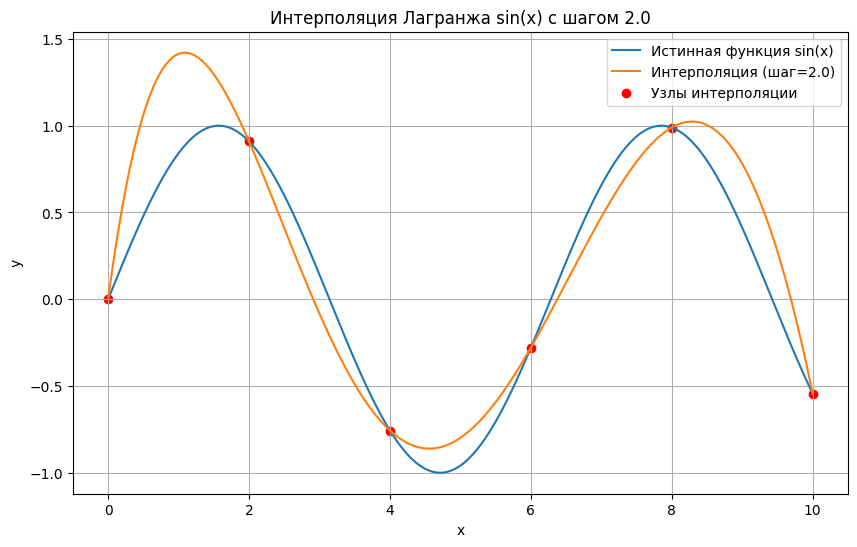

Шаг 2.0: значение в x=5.1 = -0.768489, ошибка = 0.157326
true_val -0.9258146823277325


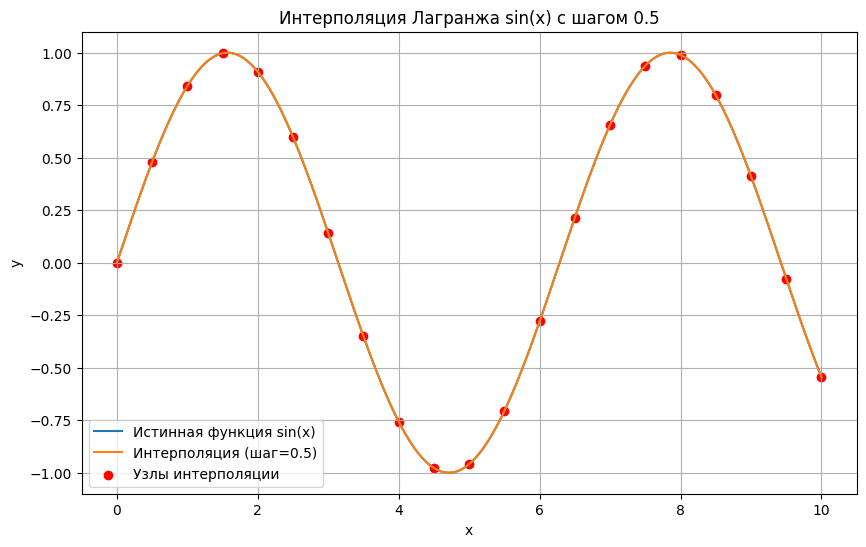

Шаг 0.5: значение в x=5.1 = -0.925815, ошибка = 0.000000
true_val -0.9258146823277325


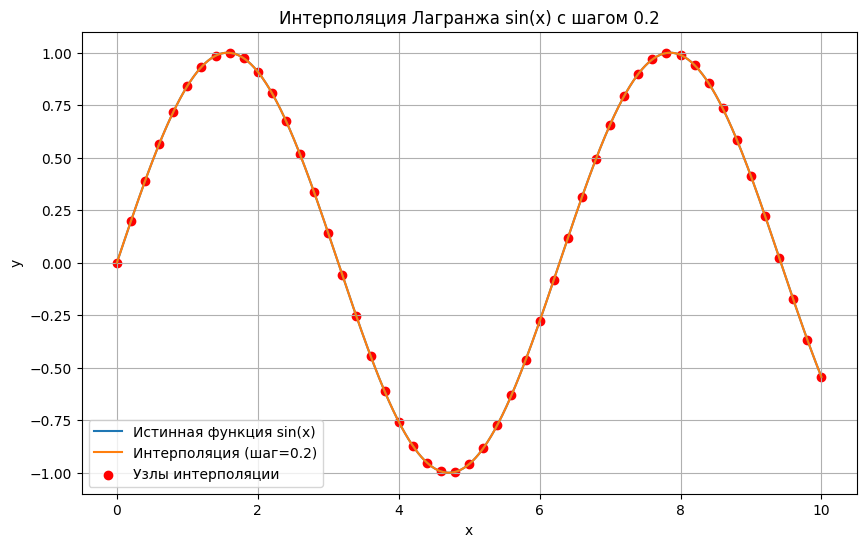

Шаг 0.2: значение в x=5.1 = -0.925815, ошибка = 0.000000
true_val -0.9258146823277325


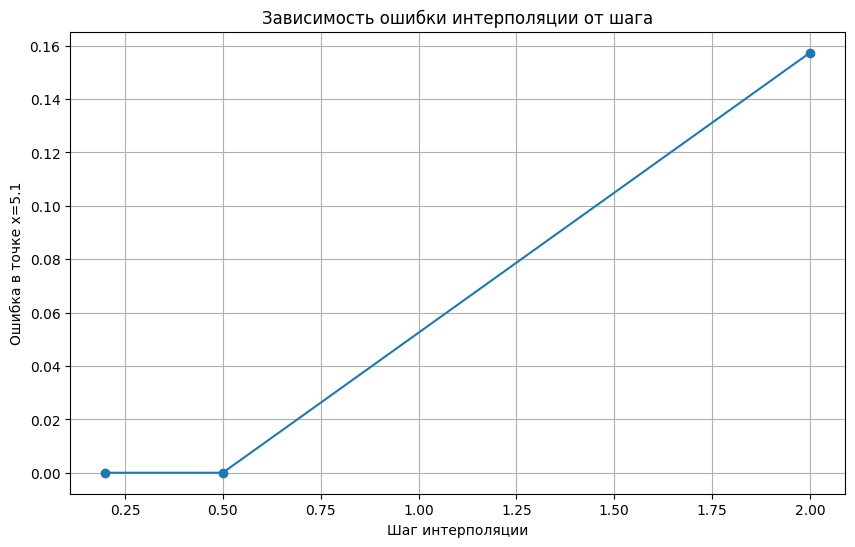

In [9]:
import numpy as np
import matplotlib.pyplot as plt
    # x_points массив узлов интерполяции
    # y_points массив значений функции в узлах
    # x массив точек для вычисления
    # возвр значение интерполяционного многочлена в точке x
def lagrange_interpolation(x_points, y_points, x):
    n = len(x_points)
    result = 0.0
    for i in range(n):
        term = y_points[i]
        for j in range(n):
            if i != j:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        result += term
    return result

# Реализуйте интерполяцию по Лагранжу функции f(x) = sin(x),
# для x в диапазоне [0;10] с шагом Δx = 2.0 с, 0.5 с, 0.2 с.
# •Для каждого случая выведите на экран интерполированный ряд
# с Δx = 0.01 с. Наложите на не интерполированный ряд.
# •Рассчитайте значение интерполированного ряда для
# x = 5.1 секунды и сравните с теоретическим значением (sin(5.1))

# параметры
x_min = 0
x_max = 10
step_sizes = [2.0, 0.5, 0.2]
eval_step = 0.01
x_eval = 5.1

# сетка для оценки интерполяции
x_dense = np.arange(x_min, x_max + eval_step, eval_step)
y_true = np.sin(x_dense)

# для каждого шага строит интерполяцию
for step in step_sizes:
    # создает узлы интерполяции
    x_nodes = np.arange(x_min, x_max + step, step)
    y_nodes = np.sin(x_nodes)
    
    # интерполирует на сетке
    y_interp = [lagrange_interpolation(x_nodes, y_nodes, x) for x in x_dense]
    
    # вычисляет значение в x=5.1
    y_eval = lagrange_interpolation(x_nodes, y_nodes, x_eval)
    true_val = np.sin(x_eval)
    error = abs(y_eval - true_val)
    
    # графики
    plt.figure(figsize=(10, 6))
    plt.plot(x_dense, y_true, label='Истинная функция sin(x)')
    plt.plot(x_dense, y_interp, label=f'Интерполяция (шаг={step})')
    plt.scatter(x_nodes, y_nodes, color='red', label='Узлы интерполяции')
    plt.title(f'Интерполяция Лагранжа sin(x) с шагом {step}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(f"Шаг {step}: значение в x=5.1 = {y_eval:.6f}, ошибка = {error:.6f}")
    print("true_val",true_val)
 

# сравнение ошибок для разных шагов
errors = []
for step in step_sizes:
    x_nodes = np.arange(x_min, x_max + step, step)
    y_nodes = np.sin(x_nodes)
    y_eval = lagrange_interpolation(x_nodes, y_nodes, x_eval)
    errors.append(abs(y_eval - np.sin(x_eval)))

plt.figure(figsize=(10, 6))
plt.plot(step_sizes, errors, 'o-')
plt.xlabel('Шаг интерполяции')
plt.ylabel('Ошибка в точке x=5.1')
plt.title('Зависимость ошибки интерполяции от шага')
plt.grid(True)
plt.show()

# Интерполяция кубическими сплайнами

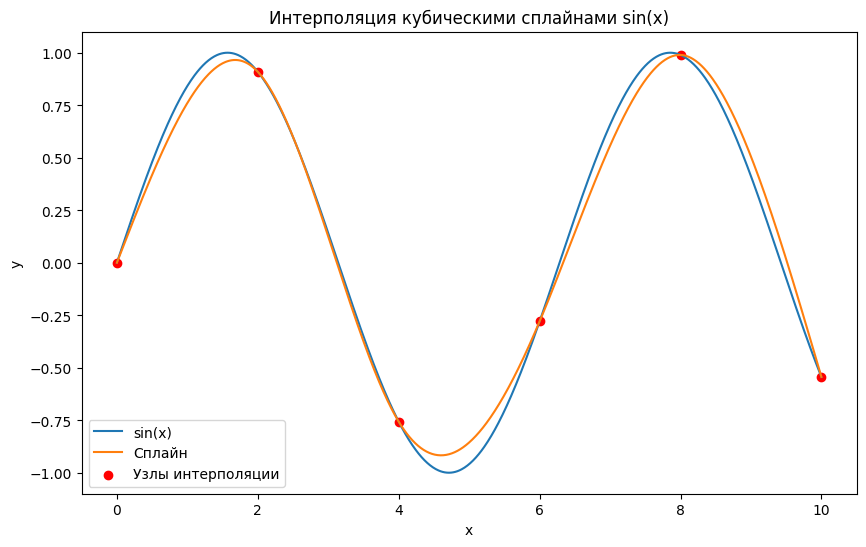

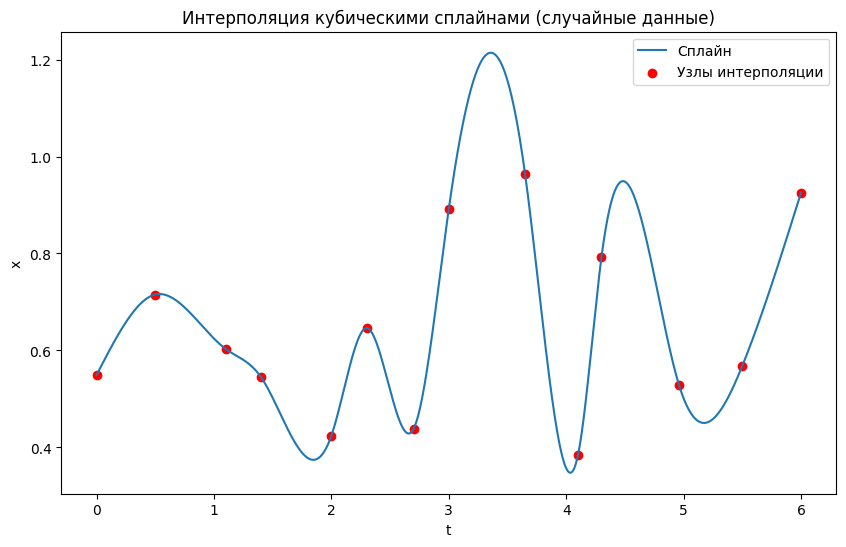

Интерполированное значение sin(5.1) = -0.8228683490050938
Точное значение sin(5.1) = -0.9258146823277325
Погрешность = 0.1029463333226387


In [10]:
import numpy as np
import matplotlib.pyplot as plt
# метод прогонки со 2
def thomas_algorithm(A, b):
    n = len(b)
    # создает копии
    A = A.copy()
    b = b.copy()
    
    # прямой ход
    for i in range(1, n):
        factor = A[i, i-1] / A[i-1, i-1]
        A[i, i] -= factor * A[i-1, i]
        b[i] -= factor * b[i-1]
        A[i, i-1] = 0  # обнуляет элемент
    
    # обратный ход
    x = np.zeros(n)
    x[-1] = b[-1] / A[-1, -1]
    for i in range(n-2, -1, -1):
        x[i] = (b[i] - A[i, i+1] * x[i+1]) / A[i, i]
    
    return x

def cubic_spline_interpolation(t, x, t_input):
    # t узловые точки
    # x значения функции в узловых точках
    # t_input точки в которых нужно вычислить интерполированные значения
    # возвр массив интерполированных значений в точках
    
    n = len(t)
    
    # Вычисляет промежутки h
    h = np.diff(t)
    
    # создает систему уравнений для коэффициентов c c[0] = 0, c[n-1] = 0
    
    if n > 2:
        # создаем матрицу системы
        A = np.zeros((n-2, n-2))
        b_vec = np.zeros(n-2)
        
        # Заполняем матрицу A и вектор b
        for i in range(1, n-1):
            idx = i-1  # индекс в матрице (0..n-3)
            
            # диагональные элементы
            A[idx, idx] = 2 * (h[i-1] + h[i])
            
            # поддиагональ
            if idx > 0:
                A[idx, idx-1] = h[i-1]
            
            # наддиагональ
            if idx < n-3:
                A[idx, idx+1] = h[i]
            
            # правая часть
            b_vec[idx] = 6 * ((x[i+1] - x[i]) / h[i] - (x[i] - x[i-1]) / h[i-1])
        
        # решает систему методом прогонки
        c_inner = thomas_algorithm(A, b_vec)
        
        # формируем полный вектор c
        c = np.zeros(n)
        c[1:-1] = c_inner
    else:
        # для n=2 (только два узла)
        c = np.zeros(n)
    
    # ычисляет коэффициенты a, b, d
    a = np.zeros(n-1)
    b_coef = np.zeros(n-1)
    d = np.zeros(n-1)
    
    for i in range(n-1):
        a[i] = x[i]
        b_coef[i] = (x[i+1] - x[i]) / h[i] - h[i] * (2 * c[i] + c[i+1]) / 6
        d[i] = (c[i+1] - c[i]) / (6 * h[i])
    
    # интерполируеь значения в точках t_input
    y_output = np.zeros_like(t_input)
    
    for idx, t_val in enumerate(t_input):
        # находит индекс интервала в который попадает t_val
        i = np.searchsorted(t, t_val) - 1
        i = max(0, min(i, n-2))  # попадание в диапазон [0, n-2]
        
        # вычисляет значение сплайна
        dt = t_val - t[i]
        y_output[idx] = a[i] + b_coef[i] * dt + 0.5 * c[i] * dt**2 + d[i] * dt**3
    
    return y_output

# 1 интерполяция функции sin(x)
x_vals = np.array([0, 2, 4, 6, 8, 10])
y_vals = np.sin(x_vals)
t_dense = np.linspace(0, 10, 1000)
y_dense = np.sin(t_dense)

# интерполяция сплайнами
y_spline = cubic_spline_interpolation(x_vals, y_vals, t_dense)

# графики
plt.figure(figsize=(10, 6))
plt.plot(t_dense, y_dense, label='sin(x)')
plt.plot(t_dense, y_spline, label='Сплайн')
plt.scatter(x_vals, y_vals, color='red', label='Узлы интерполяции')
plt.legend()
plt.title('Интерполяция кубическими сплайнами sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 2 случайные данные
np.random.seed(0)
t_random = np.array([0, 0.5, 1.1, 1.4, 2.0, 2.3, 2.7, 3.0, 3.65, 4.1, 4.3, 4.96, 5.5, 6])
x_random = np.random.random(len(t_random))
t_dense_random = np.linspace(t_random.min(), t_random.max(), 1000)

# интерполяция сплайнами
y_spline_random = cubic_spline_interpolation(t_random, x_random, t_dense_random)

# графики
plt.figure(figsize=(10, 6))
plt.plot(t_dense_random, y_spline_random, label='Сплайн')
plt.scatter(t_random, x_random, color='red', label='Узлы интерполяции')
plt.legend()
plt.title('Интерполяция кубическими сплайнами (случайные данные)')
plt.xlabel('t')
plt.ylabel('x')
plt.show()

# вычисление значения в конкретной точке
t_point = 5.1
y_point = cubic_spline_interpolation(x_vals, y_vals, [t_point])[0]
print(f"Интерполированное значение sin({t_point}) = {y_point}")
print(f"Точное значение sin({t_point}) = {np.sin(t_point)}")
print(f"Погрешность = {abs(y_point - np.sin(t_point))}")

# Метод наименьших квадратов

In [11]:
# import numpy as np

# def gaussian_elimination(A, b):
#     n = len(b)
#     A = A.copy()
#     b = b.copy()
    
#     for k in range(n):
#         max_row = k
#         for i in range(k+1, n):
#             if abs(A[i, k]) > abs(A[max_row, k]):
#                 max_row = i
#         if max_row != k:
#             A[[k, max_row]] = A[[max_row, k]]
#             b[[k, max_row]] = b[[max_row, k]]
        
#         divisor = A[k, k]
#         if divisor == 0:
#             raise ValueError("Матрица вырождена")
#         A[k] /= divisor
#         b[k] /= divisor
        
#         for i in range(k+1, n):
#             factor = A[i, k]
#             A[i] -= factor * A[k]
#             b[i] -= factor * b[k]
    
#     x = np.zeros(n)
#     for i in range(n-1, -1, -1):
#         x[i] = b[i] - np.dot(A[i, i+1:], x[i+1:])
    
#     return x

# def least_squares(t, f, p):
#     N = len(t)
#     A = np.zeros((p, p))
#     b = np.zeros(p)
    
#     for j in range(p):
#         for i in range(p):
#             A[j, i] = np.sum(t**(j + i))
#         b[j] = np.sum(f * t**j)
    
#     c = gaussian_elimination(A, b)
#     return c

# # аппроксимация прямой случайных чисел
# np.random.seed(42)
# for N in [10, 100, 1000]:
#     t = np.arange(N)
#     xi = np.random.randn(N)
#     c = least_squares(t, xi, 2)  # полином 1 порядка: c0 + c1*t
#     print(f"N={N}: c0={c[0]:.3f}, c1={c[1]:.3f}")

# # аппроксимация зашумленной квадратичной функции
# t = np.arange(-2, 2.001, 0.001)
# f_clean = t**2
# f_noisy = f_clean + 0.05 * np.random.randn(len(t))

# for order in [3, 4, 5]:  # полиномы 2, 3, 4 порядка (p=3,4,5)
#     c = least_squares(t, f_noisy, order)
#     print(f"Порядок {order-1}: коэффициенты {c}")
    

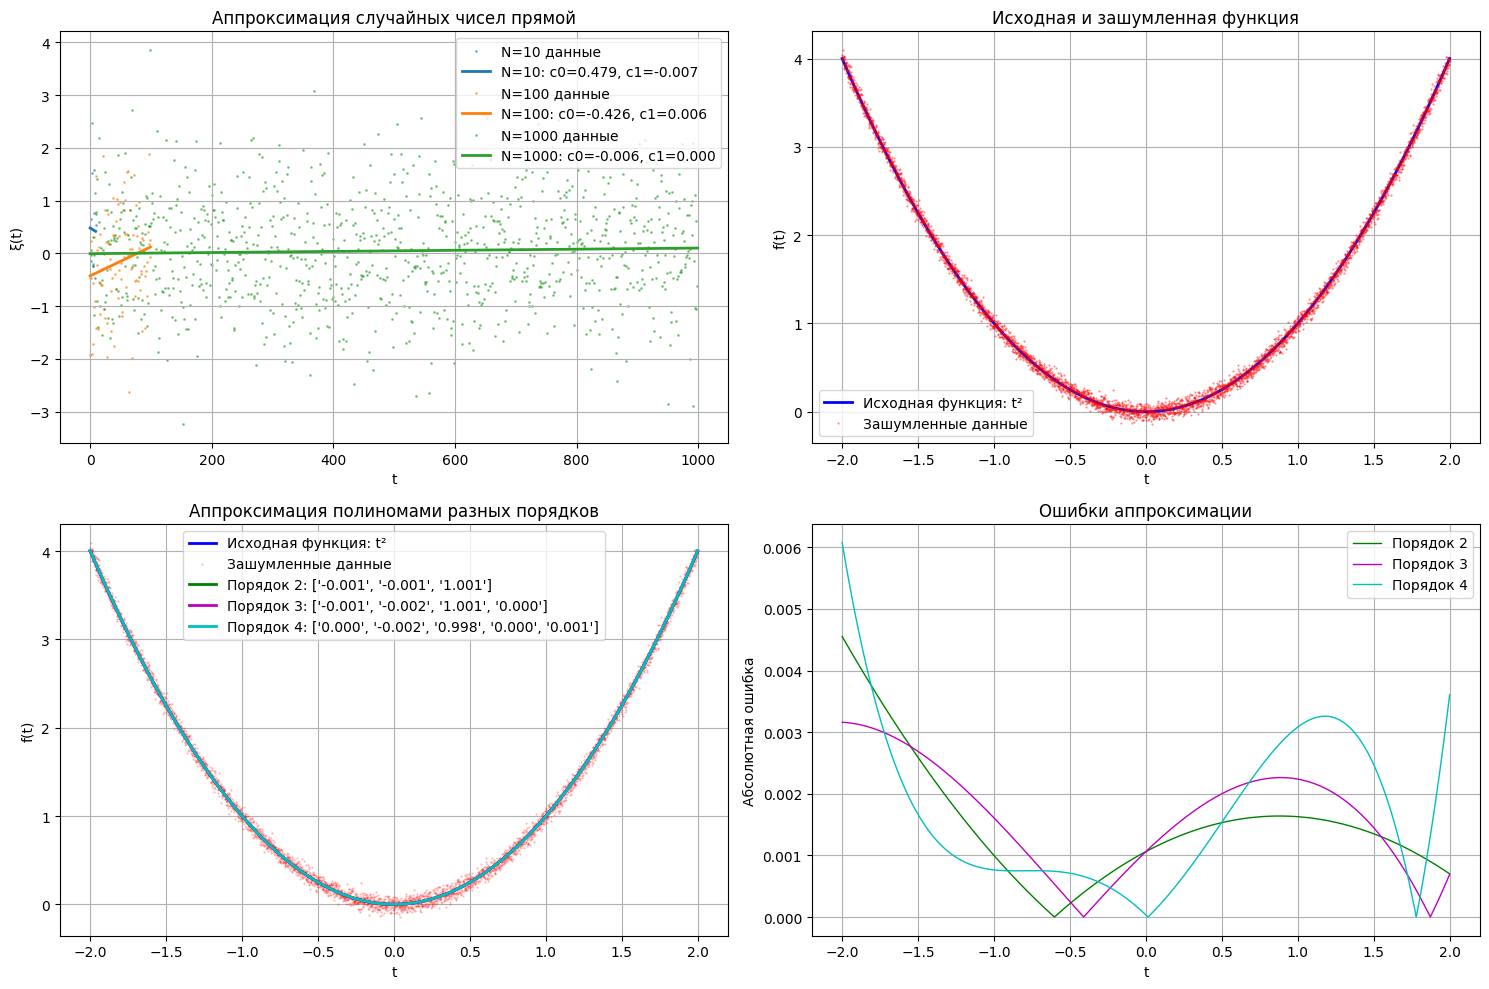

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_elimination(A, b):
    n = len(b)
    A = A.copy()
    b = b.copy()
    
    for k in range(n):
        max_row = k
        for i in range(k+1, n):
            if abs(A[i, k]) > abs(A[max_row, k]):
                max_row = i
        if max_row != k:
            A[[k, max_row]] = A[[max_row, k]]
            b[[k, max_row]] = b[[max_row, k]]
        
        divisor = A[k, k]
        if divisor == 0:
            raise ValueError("Матрица вырождена")
        A[k] /= divisor
        b[k] /= divisor
        
        for i in range(k+1, n):
            factor = A[i, k]
            A[i] -= factor * A[k]
            b[i] -= factor * b[k]
    
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = b[i] - np.dot(A[i, i+1:], x[i+1:])
    
    return x

def least_squares(t, f, p):
    N = len(t)
    A = np.zeros((p, p))
    b = np.zeros(p)
    
    for j in range(p):
        for i in range(p):
            A[j, i] = np.sum(t**(j + i))
        b[j] = np.sum(f * t**j)
    
    c = gaussian_elimination(A, b)
    return c

def evaluate_polynomial(t, coefficients):
    result = np.zeros_like(t)
    for i, c in enumerate(coefficients):
        result += c * t**i
    return result

# аппроксимация прямой случайных чисел
np.random.seed(42)
plt.figure(figsize=(15, 10))

# график
plt.subplot(2, 2, 1)
for N in [10, 100, 1000]:
    t = np.arange(N)
    xi = np.random.randn(N)
    c = least_squares(t, xi, 2)  # полином 1 порядка: c0 + c1*t
    
    plt.scatter(t, xi, s=1, alpha=0.5, label=f'N={N} данные')
    t_fine = np.linspace(0, N-1, 100)
    f_approx = evaluate_polynomial(t_fine, c)
    plt.plot(t_fine, f_approx, linewidth=2, label=f'N={N}: c0={c[0]:.3f}, c1={c[1]:.3f}')

plt.xlabel('t')
plt.ylabel('ξ(t)')
plt.title('Аппроксимация случайных чисел прямой')
plt.legend()
plt.grid(True)

# аппроксимация зашумленной квадратичной функции
t = np.arange(-2, 2.001, 0.001)
f_clean = t**2
f_noisy = f_clean + 0.05 * np.random.randn(len(t))

plt.subplot(2, 2, 2)
plt.plot(t, f_clean, 'b-', linewidth=2, label='Исходная функция: t²')
plt.plot(t, f_noisy, 'r.', markersize=1, alpha=0.5, label='Зашумленные данные')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Исходная и зашумленная функция')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(t, f_clean, 'b-', linewidth=2, label='Исходная функция: t²')
plt.plot(t, f_noisy, 'r.', markersize=1, alpha=0.3, label='Зашумленные данные')

colors = ['g', 'm', 'c']
for i, order in enumerate([3, 4, 5]):  # полиномы 2, 3, 4 порядка (p=3,4,5)
    c = least_squares(t, f_noisy, order)
    f_approx = evaluate_polynomial(t, c)
    plt.plot(t, f_approx, colors[i], linewidth=2, 
             label=f'Порядок {order-1}: {[f"{coef:.3f}" for coef in c]}')
    
    # print(f"Порядок {order-1}: коэффициенты {[f'{coef:.6f}' for coef in c]}")

plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Аппроксимация полиномами разных порядков')
plt.legend()
plt.grid(True)

# график ошибок аппроксимации
plt.subplot(2, 2, 4)
for i, order in enumerate([3, 4, 5]):
    c = least_squares(t, f_noisy, order)
    f_approx = evaluate_polynomial(t, c)
    error = np.abs(f_approx - f_clean)
    plt.plot(t, error, colors[i], linewidth=1, label=f'Порядок {order-1}')

plt.xlabel('t')
plt.ylabel('Абсолютная ошибка')
plt.title('Ошибки аппроксимации')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

